### Planteamiento del problema y recopilación de datos

Con este Dataset descargado de Kaggle, queremos analizar el abandono bancario y, en sucesivas fases, poder entrenar un modelo de Machine Learning para responder a la pregunta: "¿Qué tipo de cliente tiene más probabilidad de abandonar/cambiar una entidad 
bancaria?". Por lo tanto, encontramos que el dataset del que disponemos puede ayudarnos a resolver la cuestión planteada y aplicamos
un proceso de EDA para conocerlo con más en detalle.

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [1]:
import pandas as pd

# Configura pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Carga el archivo CSV
total_data = pd.read_csv("/workspaces/Isa-Project/data/friance new.csv", low_memory=False)

# Muestra las cinco primeras columnas del DataFrame 
total_data.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


Variables del Dataset:

Surname -> Apellido del cliente.- Tipo: int

CreditScore -> Puntuación de crédito, una medida de la solvencia crediticia. Tipo: float

Age -> Edad del cliente. Tipo: float

Tenure -> Número de años que el cliente ha sido cliente del banco. Tipo: float

Balance -> Saldo de la cuenta del cliente. Tipo: float

NumOfProducts -> Número de productos financieros que el cliente tiene con el banco. Tipo: float

IsActiveMember -> Indica si el cliente es miembro activo (1 si lo es, 0 si no). Tipo: int

HasCrCard -> Indica si el cliente tiene una tarjeta de crédito (1 si tiene, 0 si no). Tipo: int

EstimatedSalary -> Salario estimado del cliente. Tipo: object - transformar

Surname_tfidf_0 a Surname_tfidf_4 -> Características de procesamiento de texto (TF-IDF) derivadas del apellido del cliente. Tipo: object

France, Germany, Spain -> Variables dummy que indican la nacionalidad del cliente. Tipo: int

Female, Male -> Variables dummy que indican el género del cliente. Tipo: int

Exited -> Variable objetivo, indica si el cliente ha abandonado el servicio (1 ha abandonado, 0 no ha abandonado). Tipo: int

Las siguientes variables, pueden representar la relación entre variables arriba descritas, debemos analizar bien esa relación (posteriormente en el EDA lo vemos):

Mem__no__Products -> Una característica derivada que puede representar la relación entre el número de productos y la membresía activa. Tipo: float

Cred_Bal_Sal -> Una característica derivada que puede representar la relación entre el puntaje de crédito, el saldo y el salario estimado. Tipo: object - transformar

Bal_sal -> Una característica derivada que puede representar la relación entre el saldo y el salario estimado. Tipo: object - transformar

Tenure_Age -> Una característica derivada que puede representar la relación entre la antigüedad y la edad del cliente. Tipo: object - transformar

Age_Tenure_product -> Una característica derivada que puede representar la relación entre la edad, la antigüedad y el número de productos. Tipo: float


### Exploración y limpieza de datos

Una vez que hemos cargado el conjunto de datos, debemos analizarlo en su totalidad, sin disinción de train y test, para obtener
conclusiones conjuntas. Una vez que tenemos la información cargada en una estructura de datos manejable como es un DataFrame de Pandas,
podemos arrancar con el proceso.

Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital. Para ello necesitamos el atributo 
`shape` para obtener las dimensiones del objeto y la función `info()` para conocer la tipología y la cantidad de valores no nulos:

In [2]:
# Obtener las dimensiones
total_data.shape

(175028, 25)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  object 
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  object 
 11  Surname_tfidf_1     175028 non-null  object 
 12  Surname_tfidf_2     175028 non-null  object 
 13  Surname_tfidf_3     175028 non-null  object 
 14  Surname_tfidf_4     175028 non-null  object 
 15  France              175028 non-nul

Una vez hemos obtenido esta información, es importante que seamos capaces de extraer conclusiones, como las siguientes:

- Existen un total de 175028 filas (en este caso, personas) y 25 columnas, de entre las que encontramos la edad "age", "exited"...
- Observamos que todas las columnas no cuentan con valores nulos.
- Los datos cuentan con 16 características numéricas y 9 características categóricas.

#### Eliminar duplicados

Un punto muy importante a tener en cuenta en este paso es eliminar aquellas instancias que pudieran estar duplicadas en el conjunto de datos. Esto es crucial ya que, de dejarlo, el mismo punto tendría varias representaciones, lo cual es matemáticamente incoherente e incorrecto. Para ello, hemos de ser inteligentes buscando duplicados y conocer previamente si los hay y dónde, antes de eliminarlos. 

In [2]:
total_data.duplicated().sum()

69

En este caso encontramos 69 duplicados. Vamos a pasar a eliminarlos con la siguiente función:

In [3]:
total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(174959, 25)


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


#### Eliminar información irrelevante

Cuando queremos preparar los datos para entrenar un modelo predictivo debemos responder a la siguiente pregunta: ¿son todas
las características imprescindibles para realizar una predicción? Normalmente, esa pregunta es un rotundo no. Tenemos que tratar 
de ser lo más objetivos posibles y llevar a cabo este proceso previo antes de la fase de selección de características. Por lo tanto,
aquí lo que trataremos de hacer es una eliminación controlada de aquellas variables que podemos estar seguros que el algoritmo no va
a utilizar en el proceso predictivo, estas son 'Surname', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3'
y 'Surname_tfidf_4'

In [4]:
total_data.drop(['Surname', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4'], axis = 1, inplace = True)
total_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


### Análisis de variables multivariante

In [22]:
# Primero vamos a unir los tres paises en una misma variable del dataset llamada 'Countries'

# Crear la nueva variable 'Countries' basada en las tres variables de países
total_data['Countries'] = total_data['France'] * 1 + total_data['Germany'] * 2 + total_data['Spain'] * 3

# Mostrar el DataFrame resultante
total_data.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Countries
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3


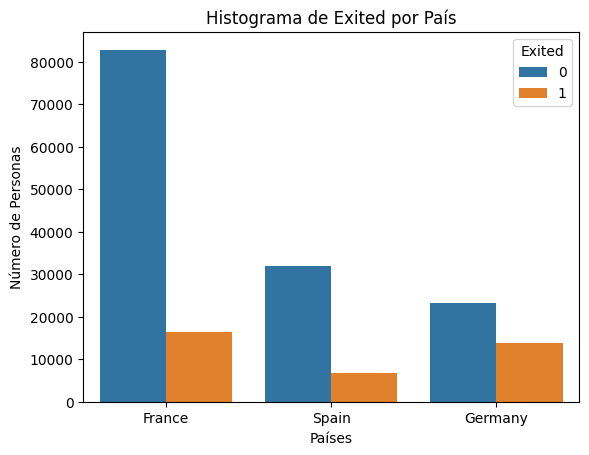

In [24]:
# Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un mapeo de etiquetas para los países
country_labels = {1: 'France', 2: 'Germany', 3: 'Spain'}

# Mapear los valores de 'Countries' a las etiquetas correspondientes
total_data['Country_Labels'] = total_data['Countries'].map(country_labels)

# Crear un histograma de barras comparando 'Country_Labels' y 'Exited'
sns.countplot(data=total_data, x='Country_Labels', hue='Exited')

# Ajustar leyendas y etiquetas
plt.title('Histograma de Exited por País')
plt.xlabel('Países')
plt.ylabel('Número de Personas')

# Mostrar el gráfico
plt.show()

Según el histograma que observamos, sobre todo en Francia hay más personas sin abandonar al igual que en los otros dos paises. El abandono dependiendo de la cantidad de personas no es grave aunque en Alemania si, siendo más de la mitad de los que no han abandonado.

Análisis de Correlación

In [7]:
total_data_numeric.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,NaN,99.0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,1,0,0,0,1,2.0,0.0,0.0,NaN,33.0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,NaN,NaN,NaN,68.0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,NaN,165.0


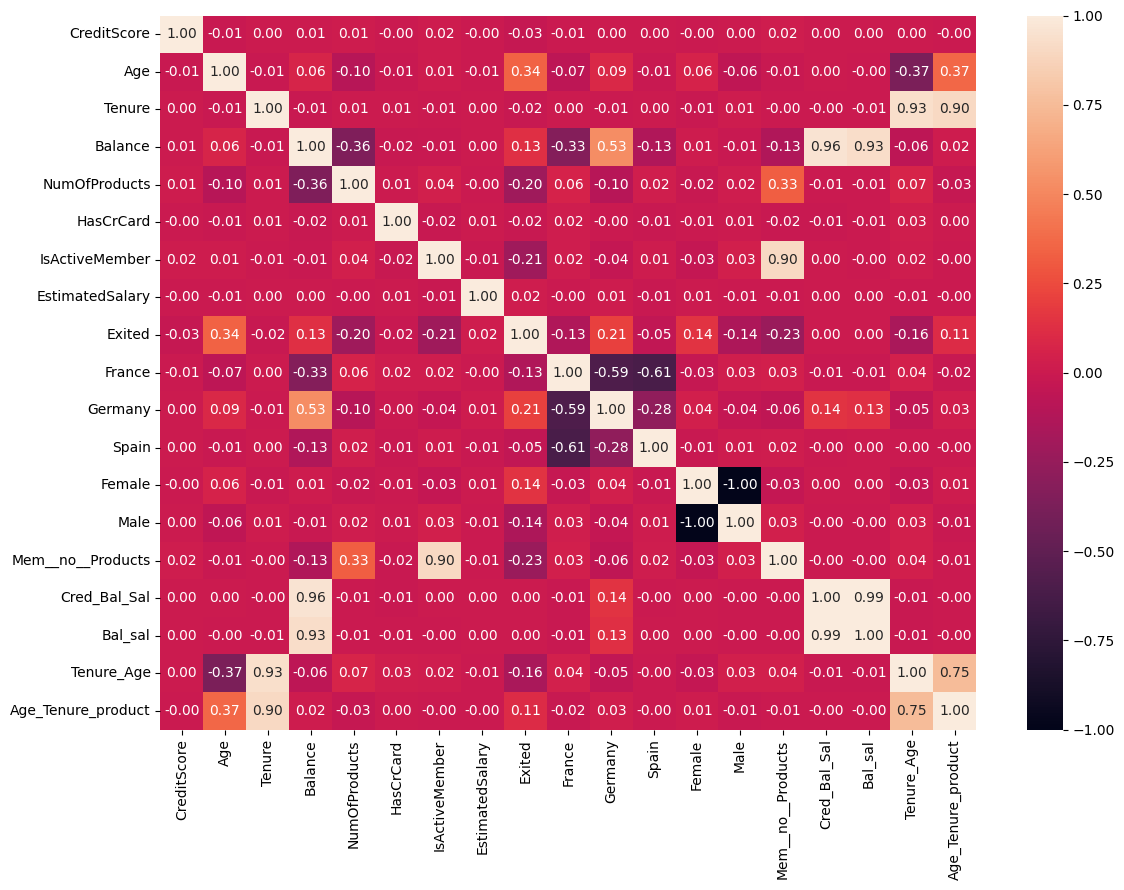

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir columnas no numéricas a numéricas (si es posible)
total_data_numeric = total_data.apply(pd.to_numeric, errors='coerce')

fig, axis = plt.subplots(figsize=(12, 9))

# Incluir todas las columnas en el análisis de correlación
sns.heatmap(total_data_numeric.corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

Un análisis de correlación utilizando un gráfico de mapa de calor nos proporciona información valiosa sobre las relaciones entre las variables del conjunto de datos comparandolo con la variable objetivo "Excited".

Vamos a comprobar las variables independientes una a una comparándolo con la variable objetivo.

In [28]:
# Lo primero juntamos la variable female y male en una única variable sex y hacemos un único dataset con las variables ya transformadas

total_data["Sex"]=total_data["Male"].apply(lambda x: 1 if x==1 else 0)
total_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Countries,Country_Labels,Sex
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,France,1
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,France,1
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1,France,1
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,France,1
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,Spain,1


[Text(0, 0.5, '')]

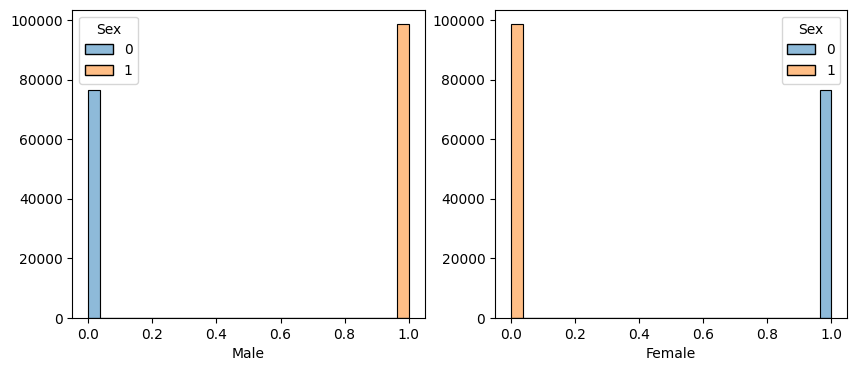

In [29]:
# Comprobamos la variable creada:

fig, axis= plt.subplots(1,2, figsize=(10,4))
sns.histplot(ax=axis[0], data = total_data, x = "Male",hue="Sex").set(ylabel = None)
sns.histplot(ax=axis[1], data = total_data, x = "Female",hue="Sex").set(ylabel = None)

Está correcta la variable: Sex=0 son las mujeres (Female) y Sex=1 son los hombres (Male)

Vamos a analizar las variables por separado primero (Age, Tenure, NumOfProducts, IsActiveMember, Sex), y después analizaremos las que parecen ser una combinación de otras (Tenure_Age,Age_Tenure_product,Mem__no__Products)

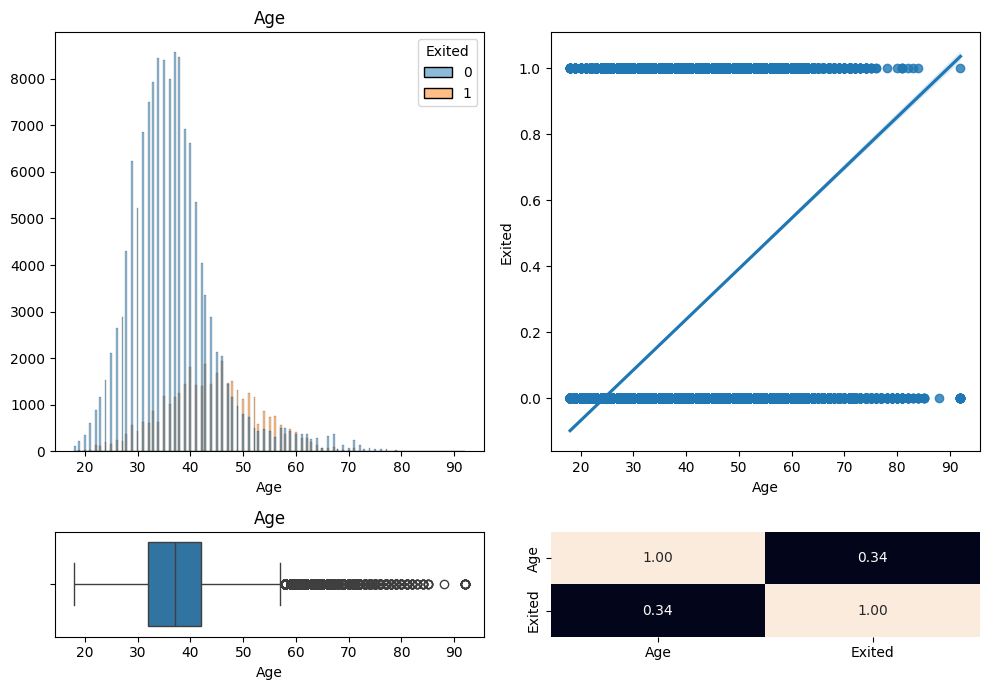

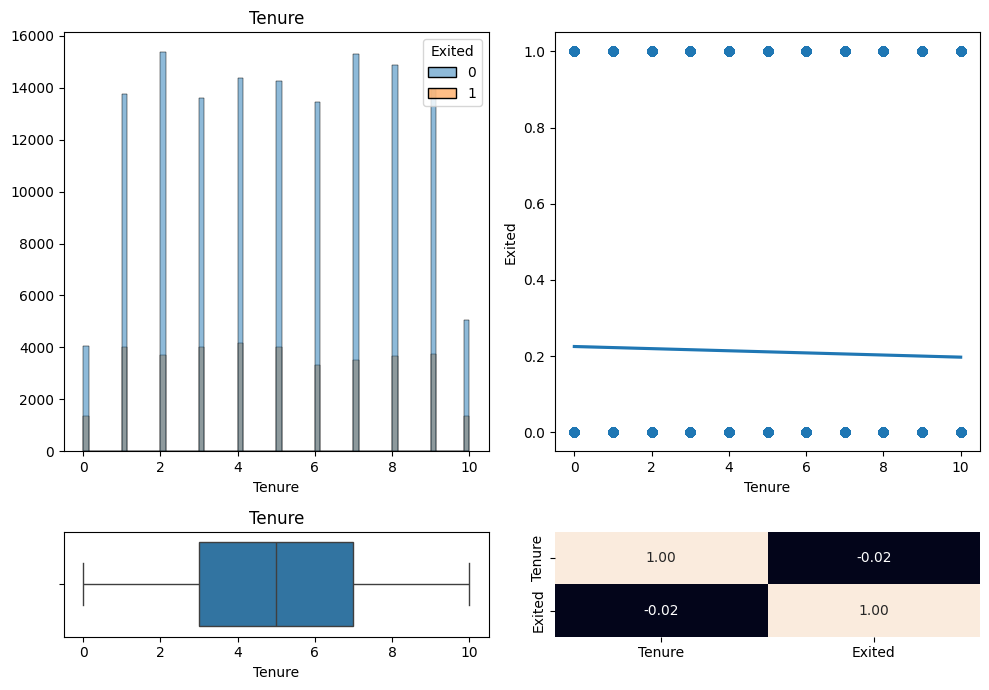

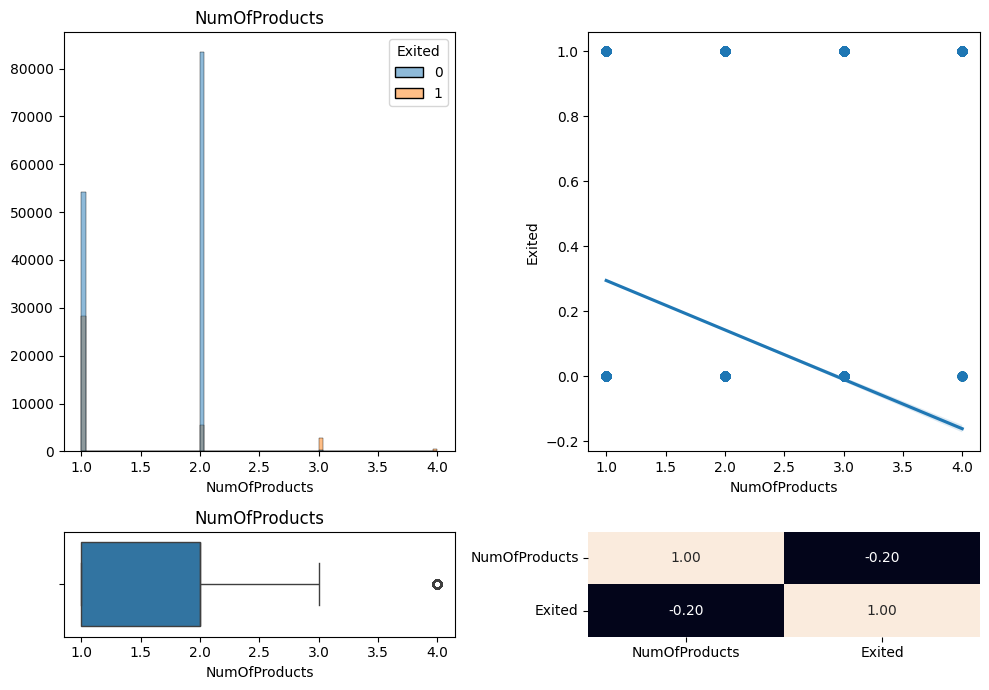

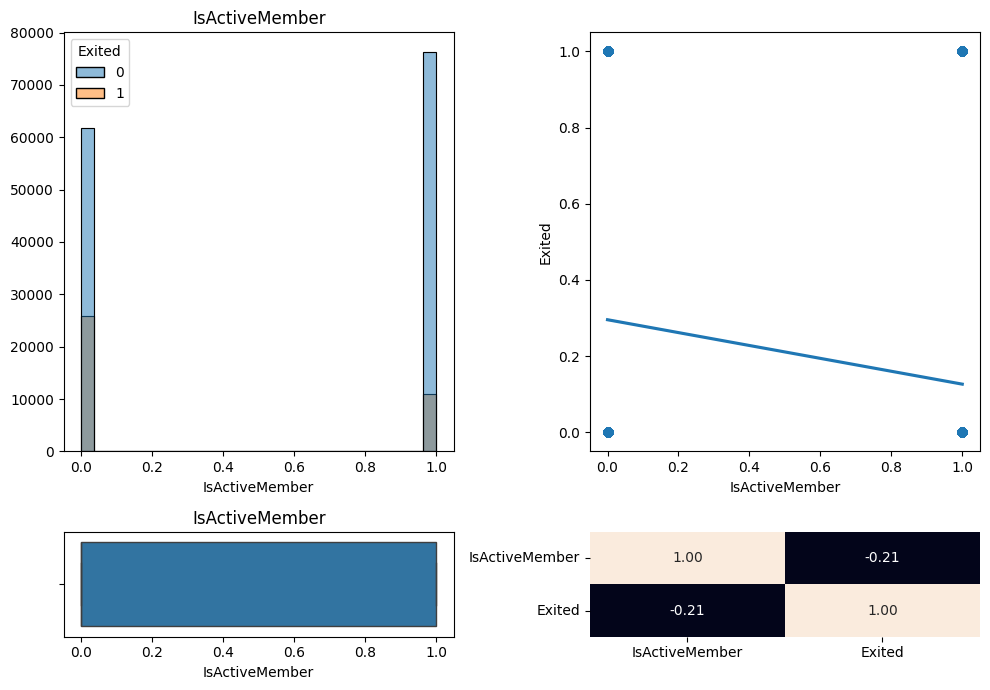

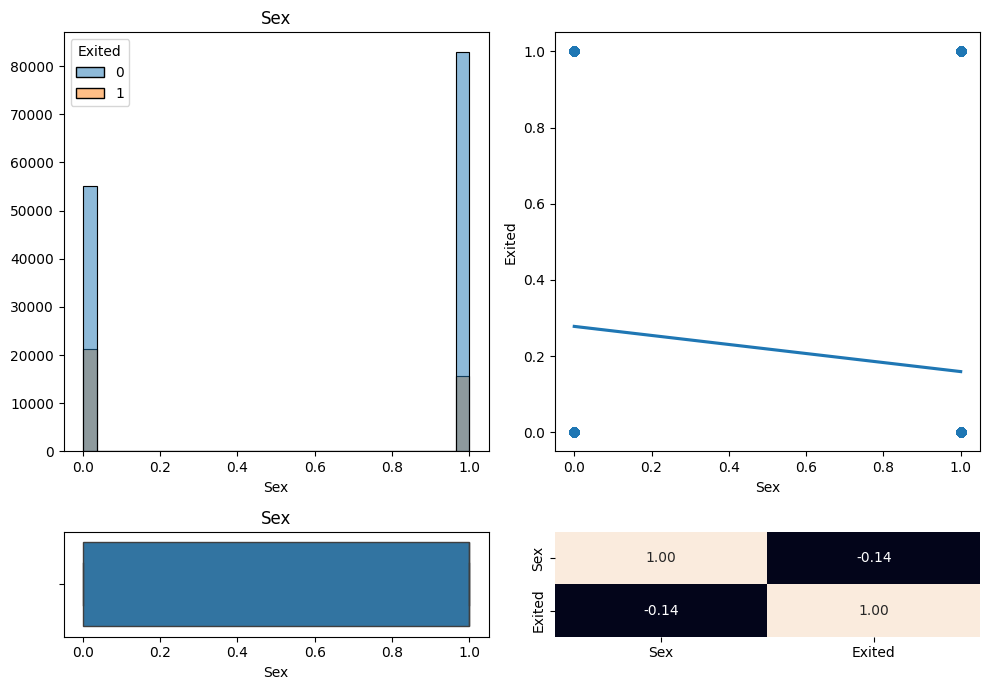

In [30]:
vars=["Age","Tenure","NumOfProducts","IsActiveMember","Sex"]
for i in range(len(vars)):
    var=vars[i]
    fig, axis = plt.subplots(2, 2, figsize = (10,7),gridspec_kw={'height_ratios': [4, 1]})
    axis[0,0].set_title(var)
    sns.histplot(ax=axis[0,0], data = total_data, x = var,hue="Exited").set(ylabel = None)
    axis[1,0].set_title(var)
    sns.regplot(data = total_data, x = var, y = "Exited",ax=axis[0,1])
    sns.boxplot(ax = axis[1,0], data = total_data, x = var)
    sns.heatmap(total_data[[var, "Exited"]].corr(), annot = True, fmt = ".2f", cbar = False,ax=axis[1,1])
    plt.tight_layout()
    plt.show()

ANALISIS DE LAS VARIABLES ARRIBA GRAFICADAS

AGE

La variable edad concentra los atípicos en los valores altos de la variable (por encima de los 60 años), sin embargo, podemos observar en el histograma, que en esos valores es donde se concentra el mayor porcentaje de abandonos (churn, nuestra variable objetivo Exited), lo que es corroborado también por la correlación positiva de 0.34 con la variable Exited. Por tanto, no vamos a tratar los outliers de la variable edad, y es una candidata a entrar en el modelo.

TENURE

La variable antigüedad, no contiene atípicos, es bastante uniforme y, además, vemos que no existe correlación ni visual (histograma) ni después en la correlación de -0.02. Esta variable es candidata a NO entrar en el modelo.

NUMOFPRODUCTS

La variable número de productos, vemos que tiene sólo 4 valores, de esos, más del 75% de los datos se concentran entre el valor 1 y 2, en la Tabla1 vemos que el 3 concentra sólo el 1% de los datos y el 4 el 0,3%. Por tanto, no podemos tomar como significativos los % de abandono que aparecen en esos bloques. Sin embargo, sí que vemos en el histograma, que para el valor 1 el % de abandono es mucho mayor que para el valor 2. Esto también se comprueba con la correlación negativa -0.20. Esta variable es candidata a entrar en el modelo.

ISACTIVEMEMBER

La variable miembro activo, dicotómica, nos muestra que también tiene una correlación negativa con nuestra variable objetivo, siendo -0.21 la correlación, y visualmente podemos comprobar que el % de abandono es mayor en el valor 0 que en el 1 (miembro activo). Esta variable es candidata a entrar en el modelo.

SEX

La variable sexo, nos indica que, mientras que el banco tiene un mayor número de hombres (56%) (ver Tabla2), el % de abandono es mayor en las mujeres (28% vs 16%). Lo cual se comprueba con una correlación negativa (1 son hombres) con nuestra variable objetivo de -0.14. Esta variable es candidata a entrar en el modelo.

CreditScore
Balance
Salary
Cred_Bal_Sal
Bal_sal
Credit card
France/ger/spai